# PIRT Camera 

In [7]:
from imagedaemon import registry
available_cameras = registry.available()
print("Registered cameras:", available_cameras)

# check the camera parameters
for camname in available_cameras:
    camera = registry.get(camname)
    print("camera:")
    for entry in camera.meta:
            print(f"\t {entry}")

Registered cameras: ['pirt', 'qcmos', 'summer-ccd', 'winter']
camera:
	 ('name', 'pirt')
	 ('pixel_scale', 0.411)
	 ('cal_steps', {'dark': True, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': True, 'replace_nans_with_median': False, 'replace_nans_with_local_median': False})
	 ('focus_cal_steps', {'dark': True, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': True, 'replace_nans_with_median': False, 'replace_nans_with_local_median': False})
	 ('sex_cfg_dir', PosixPath('/home/winter/GIT/winter-image-daemon/imagedaemon/config'))
	 ('scale_margin', 0.05)
	 ('hot_pixel_threshold', 14000)
	 ('focus_addrs', [])
camera:
	 ('name', 'qcmos')
	 ('pixel_scale', 0.157)
	 ('cal_steps', {'dark': False, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': True, 're

In [8]:
# PIRT Pipeline
import os
pirt = registry.get("pirt")

dark_dir = os.path.join(os.path.expanduser("~"), "data", "image-daemon-data",
                        "raw", "pirt","commissioning", "20250803", "darks")


print(f"Using darks from {dark_dir}")


Using darks from /home/winter/data/image-daemon-data/raw/pirt/commissioning/20250803/darks


In [6]:
# Make the master darks
pirt.build_master_frames(src_dir=dark_dir,
                         obstype = "dark")

Empty DataFrame
Columns: []
Index: []


AttributeError: 'DataFrame' object has no attribute 'obstype'

[I imagedaemon.pipeline] Calibration started | camera=pirt image=/home/winter/data/image-daemon-data/raw/pirt/science/WNTR25fejjz/scicam_20250804T111809.fits


Science image: /home/winter/data/image-daemon-data/raw/pirt/science/WNTR25fejjz/scicam_20250804T111809.fits
running _calibrate_data with addr=None
[DEBUG][None] raw: finite=1310720/1310720, min=265, max=1.62e+04
[DEBUG][None] after dark: finite=1310720/1310720, min=-3.42e+03, max=1.1e+04
[DEBUG][None] after hot pixel mask: finite=1310720/1310720, min=-3.42e+03, max=1.1e+04


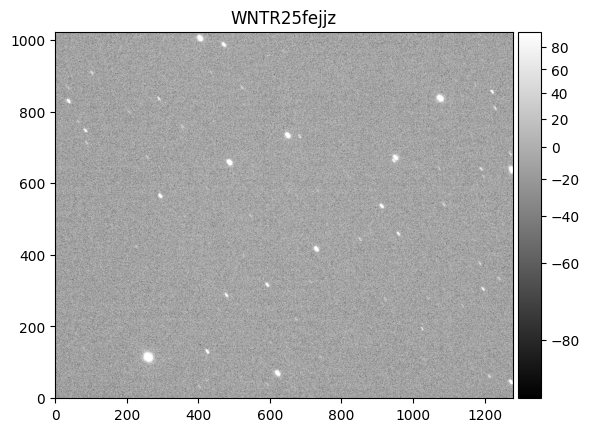

In [10]:
# Try to run the cal pipeline on a dither set
import os
from glob import glob
targetName = "WNTR25fejjz"
science_dir = os.path.join(os.path.expanduser("~"), "data", 
                           "image-daemon-data", "raw", "pirt", 
                           "science",targetName)

science_image = glob(os.path.join(science_dir, "*.fits"))[0]


print("Science image:", science_image)

callimg = pirt.calibrate_image(science_image = science_image
                               ,
                               )
callimg.plot_image(title = targetName)

calimg_savepath = os.path.join(science_dir, f"{targetName}_calibrated.fits")
callimg.save_image(calimg_savepath)




In [11]:
# Run astrometry
# run the full astrometric pipeline
output_dir = os.path.join(os.path.join(os.getenv("HOME"), "data", "tmp"))

info = pirt.get_astrometric_solution(science_image = science_image,
                                      output_dir = output_dir,
                                      #ra = 9.88,
                                      #dec = 41.19,
    )

wcs = info["wcs"]

print("WCS:", wcs)



[I imagedaemon.pipeline] Calibration started | camera=pirt image=/home/winter/data/image-daemon-data/raw/pirt/science/WNTR25fejjz/scicam_20250804T111809.fits


we are here we are here
running _calibrate_data with addr=None
[DEBUG][None] raw: finite=1310720/1310720, min=265, max=1.62e+04
[DEBUG][None] after dark: finite=1310720/1310720, min=-3.42e+03, max=1.1e+04
[DEBUG][None] after hot pixel mask: finite=1310720/1310720, min=-3.42e+03, max=1.1e+04
RA, Dec = 9.880332, 41.191133
astrometry_opts = {'scale_low': 0.39044999999999996, 'scale_high': 0.43155, 'ra': 9.880332, 'dec': 41.191133}
[astrometry] solve-field /home/winter/data/tmp/scicam_20250804T111809.cal.fits --scale-units arcsecperpix --scale-low 0.39044999999999996 --scale-high 0.43155 --ra 9.880332 --dec 41.191133 --radius 2.0 --downsample 2 --overwrite --no-plots --cpulimit 30 

Reading input file 1 of 1: "/home/winter/data/tmp/scicam_20250804T111809.cal.fits"...
Extracting sources...
Downsampling by 2...
simplexy: found 199 sources.
Solving...
Reading file "/home/winter/data/tmp/scicam_20250804T111809.cal.axy"...
Only searching for solutions within 2 degrees of RA,Dec (9.88033,41.1911

Found 7 focus images.
Focus images: ['/home/winter/data/image-daemon-data/raw/pirt/focus/scicam_20250804T103831.fits', '/home/winter/data/image-daemon-data/raw/pirt/focus/scicam_20250804T103931.fits', '/home/winter/data/image-daemon-data/raw/pirt/focus/scicam_20250804T103701.fits', '/home/winter/data/image-daemon-data/raw/pirt/focus/scicam_20250804T103631.fits', '/home/winter/data/image-daemon-data/raw/pirt/focus/scicam_20250804T103801.fits', '/home/winter/data/image-daemon-data/raw/pirt/focus/scicam_20250804T103901.fits', '/home/winter/data/image-daemon-data/raw/pirt/focus/scicam_20250804T103731.fits']
type(focus_images): <class 'list'>


AttributeError: 'PosixPath' object has no attribute 'data'

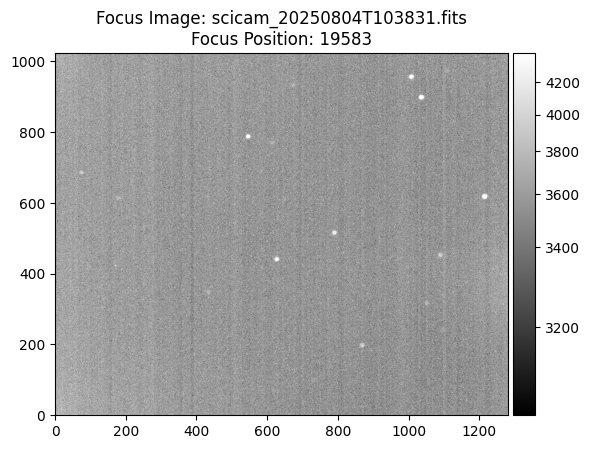

In [14]:
# Focus attempt
from imagedaemon.utils.image import Image
from glob import glob
focus_dir = os.path.join(os.path.expanduser("~"), "data", "image-daemon-data",
                        "raw", "pirt","focus")
focus_images = glob(os.path.join(focus_dir, "*.fits"))
print(f"Found {len(focus_images)} focus images.")

# plot one
img = Image(focus_images[0])
img.plot_image(title = f"Focus Image: {img.filename}\nFocus Position: {img.header['FOCPOS']:.0f}",)

print(f"Focus images: {focus_images}")
print(f"type(focus_images): {type(focus_images)}")
'''
res = pirt._load_focus_images(focus_images)
print(f"Focus images loaded: {res}")
# calibrate all the focus images
focus_calibrated = pirt.calibrate_for_focus(
    image_paths = focus_images,
    out_dir = os.path.join(os.path.expanduser("~"), "data", "tmp"),
)
print(f"Focus calibrated images: {focus_calibrated}")
'''


# now try for a focus loop

results = pirt.run_focus_loop(image_list = focus_images,
                                   addrs = None,
                                   output_dir = os.path.join(os.path.expanduser("~"), "data", "tmp"),
)

print(f"Focus loop results: {results}")

# plot the first one
#focus_calibrated[0].plot_image(f"First Focus Calibrated Image: {focus_calibrated[0].filename}",)

In [ ]:
from imagedaemon import registry
import os
from glob import glob
available_cameras = registry.available()
print("Registered cameras:", available_cameras)

# check the camera parameters
for camname in available_cameras:
    camera = registry.get(camname)
    print("camera:")
    for entry in camera.meta:
        print(f"\t {entry}")

pirt = registry.get("pirt")
science_dir = os.path.join(os.path.expanduser("~"), "data", "image-deamon-data",
                           "raw", "pirt","commissioning", "20250803", "science","WNTR25fejjz")

Registered cameras: ['pirt', 'qcmos', 'summer-ccd', 'winter']
camera:
	 ('name', 'pirt')
	 ('pixel_scale', 0.411)
	 ('cal_steps', {'dark': True, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': True, 'replace_nans_with_median': False, 'replace_nans_with_local_median': False})
	 ('focus_cal_steps', {'dark': True, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': True, 'replace_nans_with_median': False, 'replace_nans_with_local_median': False})
	 ('sex_cfg_dir', PosixPath('/Users/nlourie/Desktop/Work/MIT/WINTER/GIT/winter-image-daemon/imagedaemon/config'))
	 ('scale_margin', 0.05)
	 ('hot_pixel_threshold', 14000)
	 ('focus_addrs', [])
camera:
	 ('name', 'qcmos')
	 ('pixel_scale', 0.157)
	 ('cal_steps', {'dark': False, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'm